#       CAPSTONE-1 (Employee Attrition Analysis)

In [17]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc

In [18]:
df=pd.read_csv('HR_Employee_Attrition_Data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [19]:
df['Attrition'].count()

2940

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
pd.set_option('display.max_columns', None)  # Display Max columns

In [ ]:
# Target variable is Attrition(Y/N)

In [6]:
# Cheking the information on the Dataset: 26 Discrete Columns(Int64) snd 9 categorical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [7]:
# CHeck the shape of the data
df.shape
# There are 2940 rows and 35 Columns

(2940, 35)

In [8]:
# Reading one of the record
df.loc[2939]

Age                                             34
Attrition                                       No
BusinessTravel                       Travel_Rarely
DailyRate                                      628
Department                  Research & Development
DistanceFromHome                                 8
Education                                        3
EducationField                             Medical
EmployeeCount                                    1
EmployeeNumber                                2940
EnvironmentSatisfaction                          2
Gender                                        Male
HourlyRate                                      82
JobInvolvement                                   4
JobLevel                                         2
JobRole                      Laboratory Technician
JobSatisfaction                                  3
MaritalStatus                              Married
MonthlyIncome                                 4404
MonthlyRate                    

In [9]:
df.select_dtypes(include='object').columns   # Object datatype columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [10]:
df.select_dtypes(include='int64').columns  # Discrete columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### EDA-Exploratoory Data Analysis

In [11]:
# Check if there are any Null Values
df.isnull().sum()
# We can see there are no null balues

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

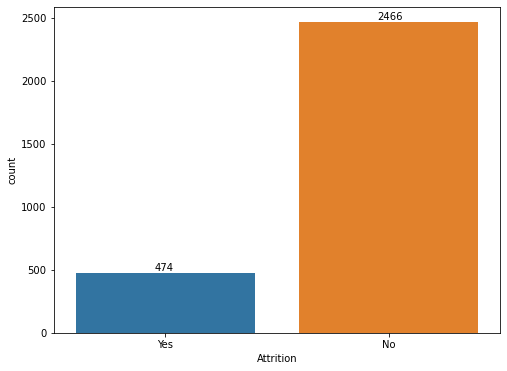

Attrition % in the organization is:  16.12


In [12]:
# Plotting the attrition count
plt.figure(figsize=(8,6))
ax=sns.countplot('Attrition',data=df)
for p in ax.patches:  
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+20))   # To display the values of count
plt.show()
# Attrition percent
print("Attrition % in the organization is: ",
      ((df['Attrition'].value_counts()['Yes']/df['Attrition'].count())*100).round(2))
# Insight-1 The attrition rate is 16.12% as per the data given in the dataset.\


In [ ]:
# Data is highly imbalance so we can try balancing it using SMOTE techniques if model does not perform well.

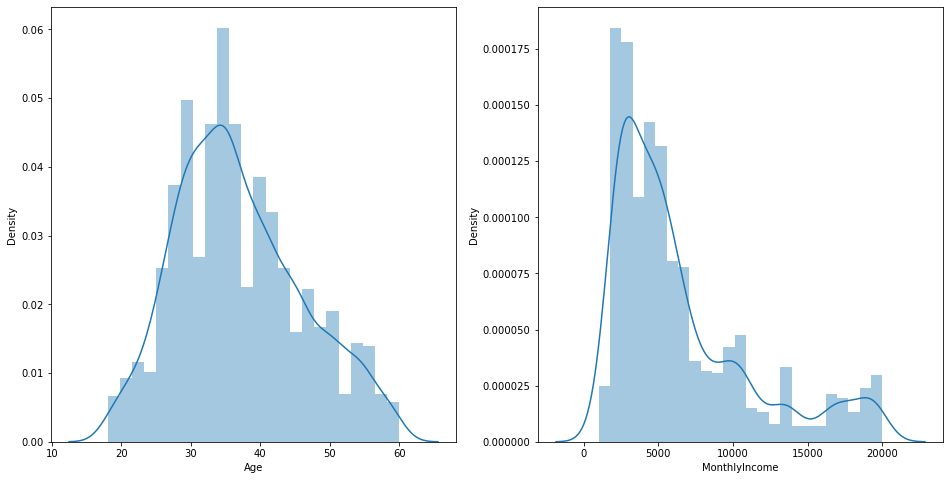

In [13]:
# Plot the data- Monthly income
fig,axes=plt.subplots(1,2,figsize=(16,8))
sns.distplot(df['Age'],ax=axes[0])
sns.distplot(df['MonthlyIncome'],ax=axes[1])
plt.show()
#Insight-2
# Age Column is normally distributed
# MOnthy income is right skewed which means there are some peoples who are having higher monthly incomes.


In [14]:
df['Gender'].value_counts()

Male      1764
Female    1176
Name: Gender, dtype: int64

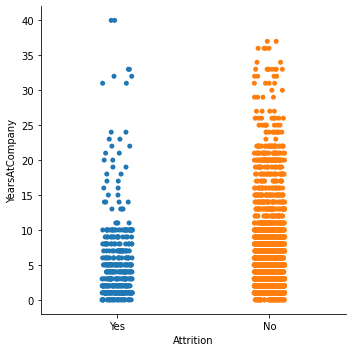

In [15]:
sns.catplot(x = 'Attrition', y = 'YearsAtCompany', data = df)
plt.show()
# Insight-3: MOst of the employees who are leaving are those with experiance in 0-10 years range. SO the attrition rate 
# among the more experianced people is quite less.

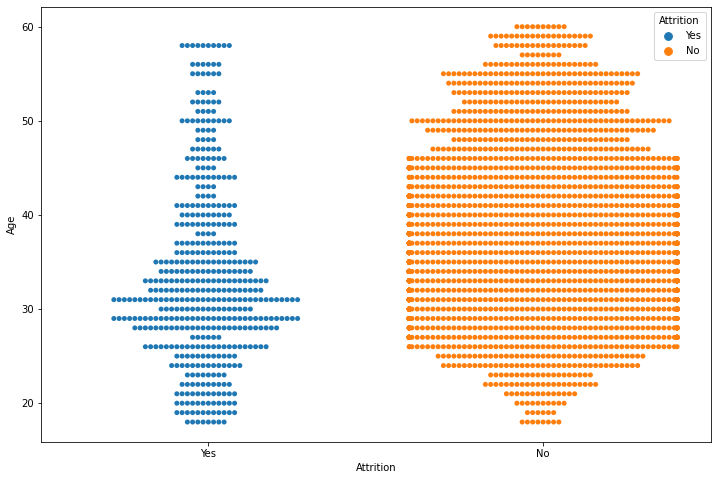

In [16]:
plt.figure(figsize=(12,8))
sns.swarmplot(x = 'Attrition', y = 'Age', data = df,hue='Attrition')
plt.show()
# Insight-4
# there does not seem any relationship between age and attrition but
#it looks like major attrition is among the range 25-37 years Age

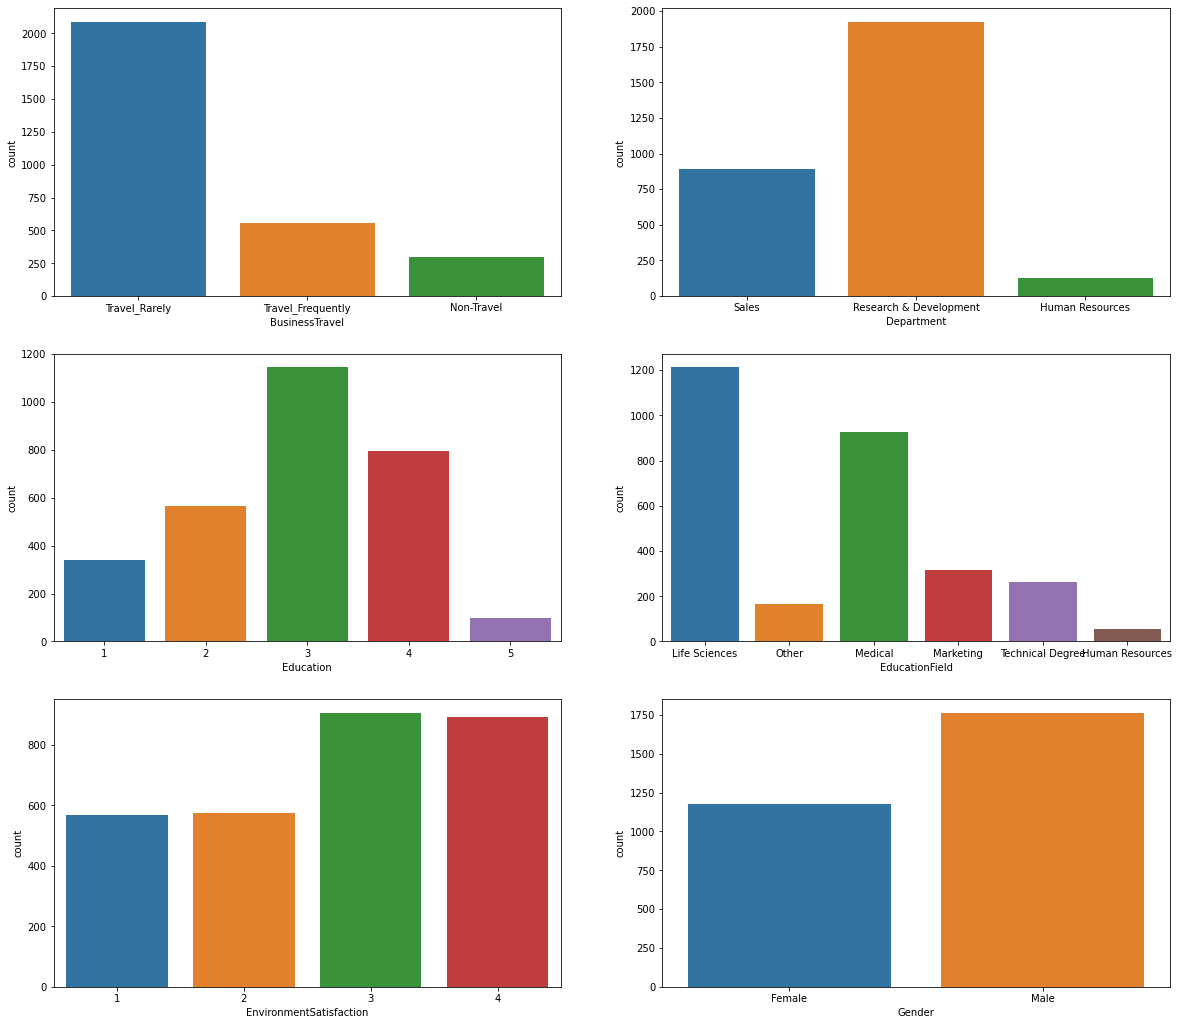

In [17]:
# Plotting for various categorical variables to see the distibution of data
fig,axes=plt.subplots(3,2,figsize=(20,18))
sns.countplot(df['BusinessTravel'],ax=axes[0,0])
sns.countplot(df['Department'],ax=axes[0,1])
sns.countplot(df['Education'],ax=axes[1,0])
sns.countplot(df['EducationField'],ax=axes[1,1])
sns.countplot(df['EnvironmentSatisfaction'],ax=axes[2,0])
sns.countplot(df['Gender'],ax=axes[2,1])
plt.show()
# Insight-5- out of the three depatments(Sales,R&D,HR) most of the employees are in research and development deprtment.

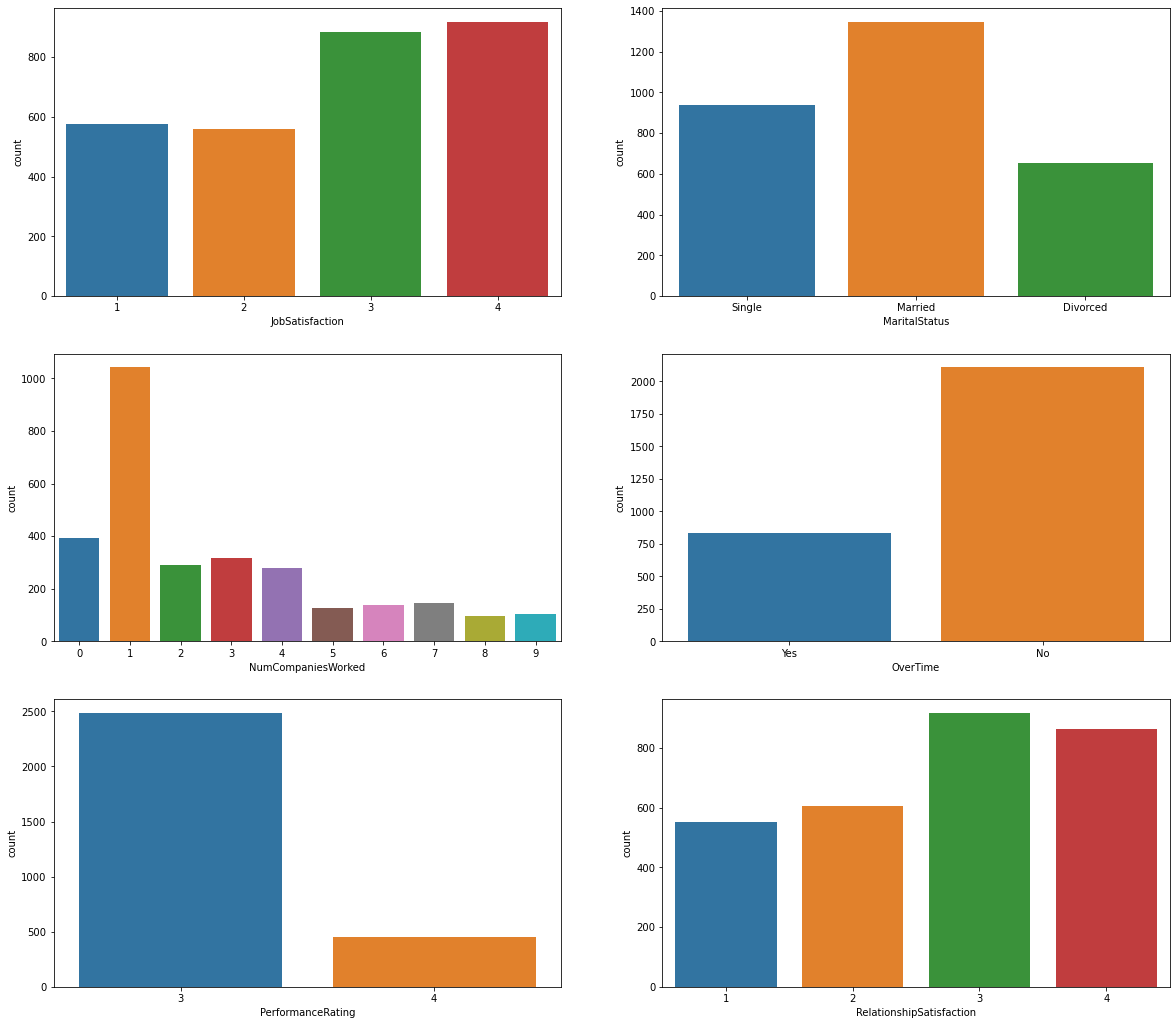

In [18]:
# Some more categorical Graphs to see the distibution of data
fig,axes=plt.subplots(3,2,figsize=(20,18))
sns.countplot(df['JobSatisfaction'],ax=axes[0,0])
sns.countplot(df['MaritalStatus'],ax=axes[0,1])
sns.countplot(df['NumCompaniesWorked'],ax=axes[1,0])
sns.countplot(df['OverTime'],ax=axes[1,1])
sns.countplot(df['PerformanceRating'],ax=axes[2,0])
sns.countplot(df['RelationshipSatisfaction'],ax=axes[2,1])
plt.show()

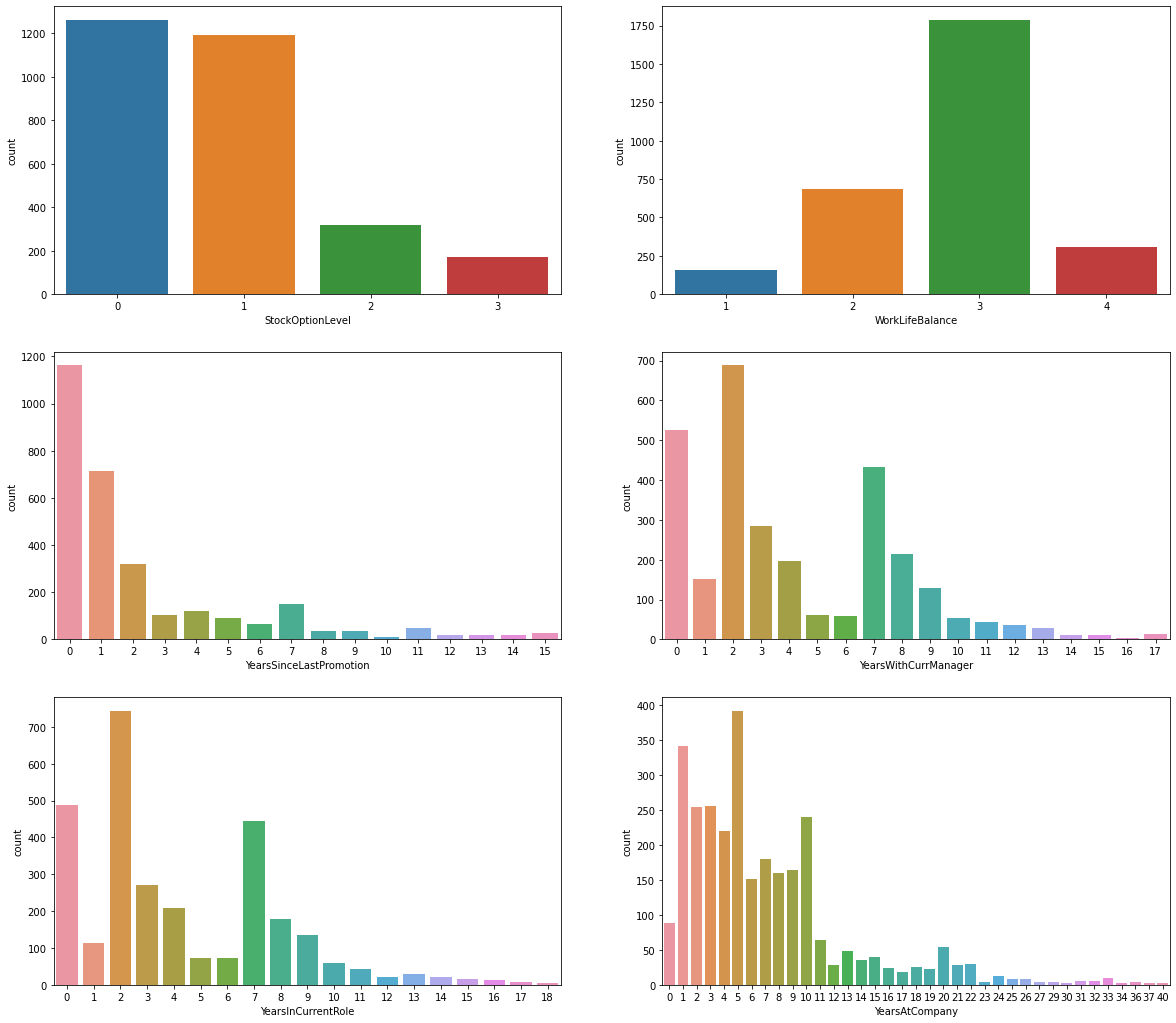

In [19]:
# Some more categorical Graphs to see the distibution of data
fig,axes=plt.subplots(3,2,figsize=(20,18))
sns.countplot(df['StockOptionLevel'],ax=axes[0,0])
sns.countplot(df['WorkLifeBalance'],ax=axes[0,1])
sns.countplot(df['YearsSinceLastPromotion'],ax=axes[1,0])
sns.countplot(df['YearsWithCurrManager'],ax=axes[1,1])
sns.countplot(df['YearsInCurrentRole'],ax=axes[2,0])
sns.countplot(df['YearsAtCompany'],ax=axes[2,1])
plt.show()

In [20]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

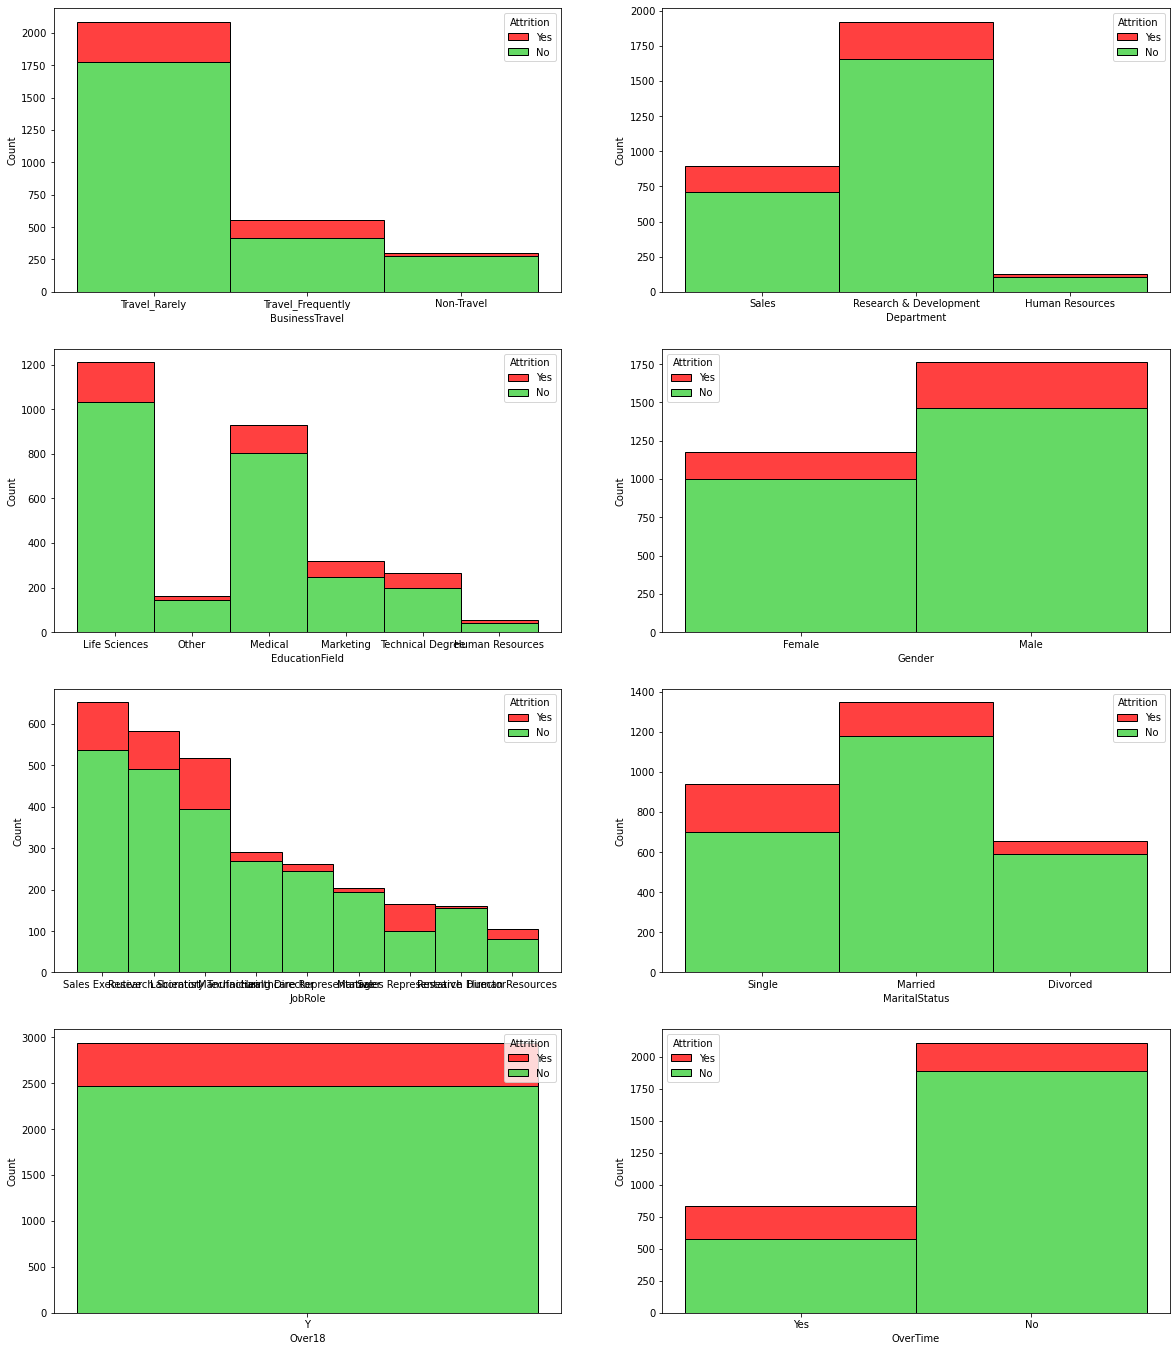

In [21]:
fig,axes=plt.subplots(4,2,figsize=(20,24))
sns.histplot(df,x='BusinessTravel',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'],ax=axes[0,0])
sns.histplot(df,x='Department',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'],ax=axes[0,1])
sns.histplot(df,x='EducationField',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'],ax=axes[1,0])
sns.histplot(df,x='Gender',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'],ax=axes[1,1])
sns.histplot(df,x='JobRole',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'],ax=axes[2,0])
sns.histplot(df,x='MaritalStatus',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'],ax=axes[2,1])
sns.histplot(df,x='Over18',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'],ax=axes[3,0])
sns.histplot(df,x='OverTime',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'],ax=axes[3,1])
plt.show()
# Insight-6: All the employees  are over 18 so we can drop the over 18 column as zero variance. 
# Attrition is not dependent on gender. It is almost same % for both male and female.
# Attrition is high in the employees doing overtime.
# There is a low attrition rate in the divorced marital status

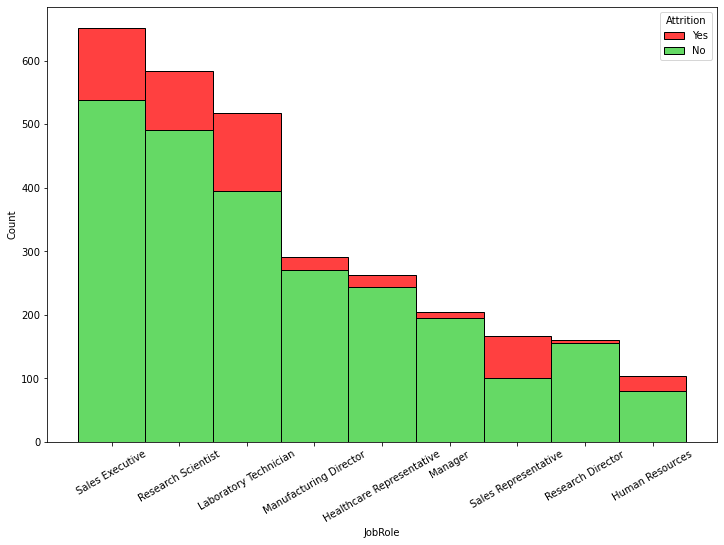

In [22]:
plt.figure(figsize=(12,8))
sns.histplot(df,x='JobRole',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'])
plt.xticks(rotation=30)
plt.show()
#Insight-7: We can see from the below graph that there is high attrition in Sales and research related job roles
#there is high attrion in sales executive , reasearch scientists, laboratory technicians and sales representatives
#  Attrition rate (%) is very high in sales representatives.

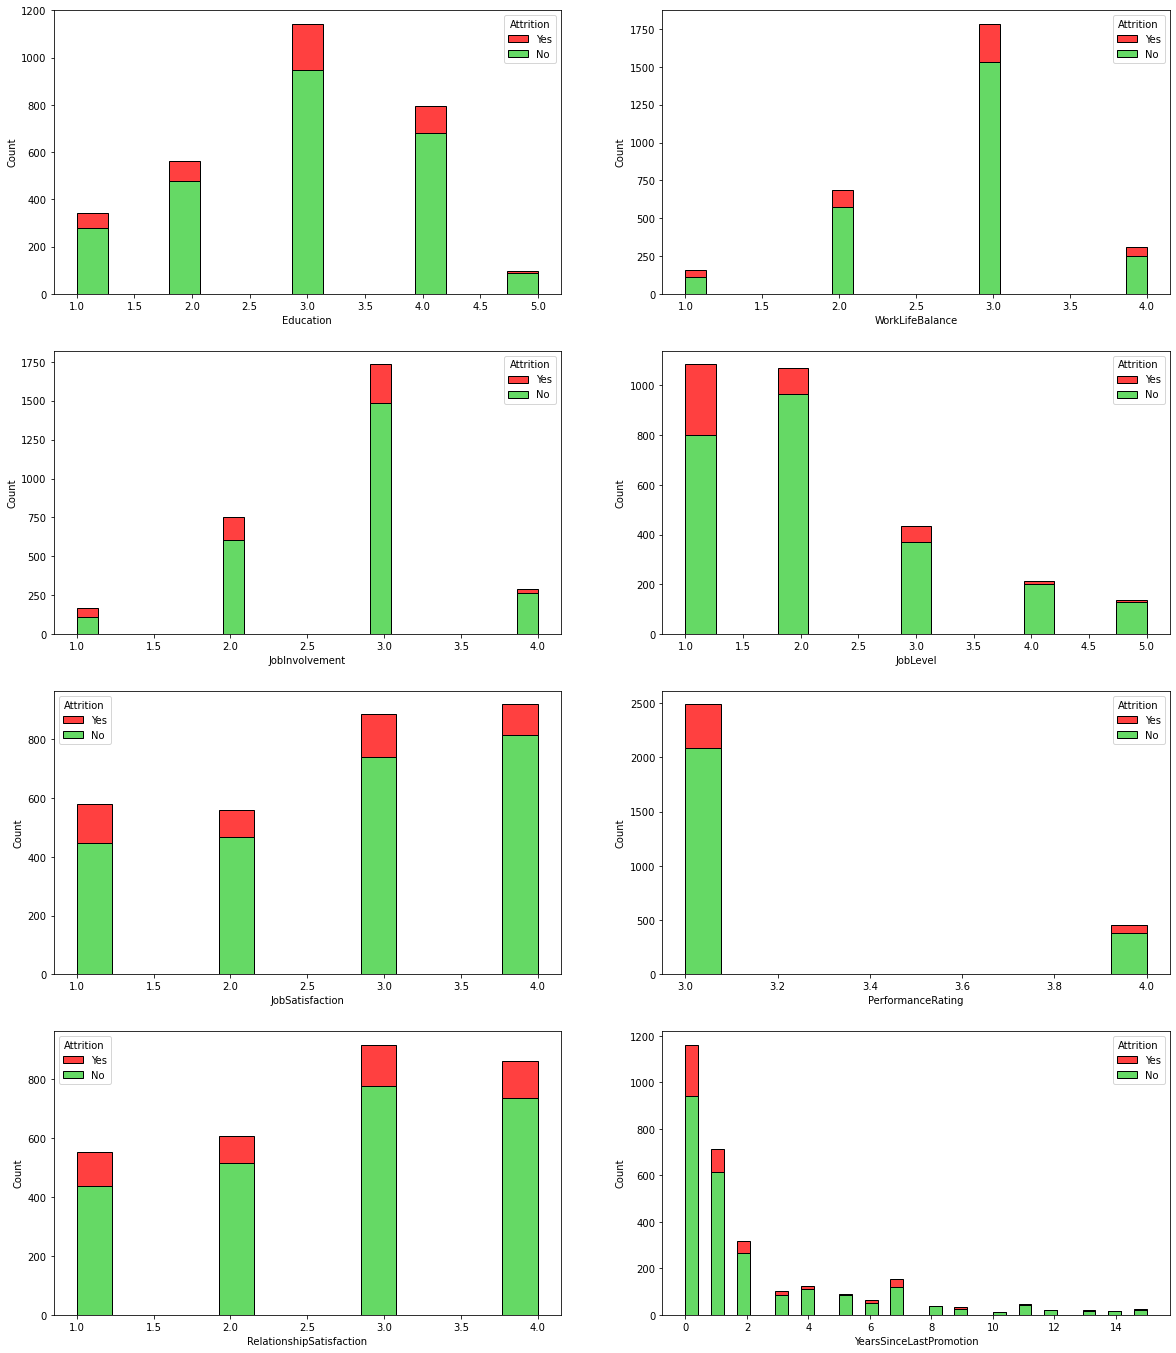

In [91]:
fig,axes=plt.subplots(4,2,figsize=(20,24))
sns.histplot(df,x='Education',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'],ax=axes[0,0])
sns.histplot(df,x='WorkLifeBalance',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'],ax=axes[0,1])
sns.histplot(df,x='JobInvolvement',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'],ax=axes[1,0])
sns.histplot(df,x='JobLevel',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'],ax=axes[1,1])
sns.histplot(df,x='JobSatisfaction',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'],ax=axes[2,0])
sns.histplot(df,x='PerformanceRating',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'],ax=axes[2,1])
sns.histplot(df,x='RelationshipSatisfaction',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'],ax=axes[3,0])
sns.histplot(df,x='YearsSinceLastPromotion',hue='Attrition',multiple='stack',palette = ['red', 'limegreen'],ax=axes[3,1])
plt.show()


In [85]:
df.select_dtypes(include='int64').columns 

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [23]:
df.shape

(2940, 35)

In [24]:
df.info()
# There are total 35 columns, out of which 26 are discrete and 9 are categorical. There are no null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [25]:
# copying the data for backup use
attrdf=df.copy()


In [26]:
from sklearn import preprocessing
# Converting the non numeric columsn to numeric values:
def preprocessor(df1):
    res_df=df1.copy()
    le=preprocessing.LabelEncoder()
    res_df['Attrition']=le.fit_transform(res_df['Attrition'])
    res_df['BusinessTravel']=le.fit_transform(res_df['BusinessTravel'])
    res_df['Department']=le.fit_transform(res_df['Department'])
    res_df['EducationField']=le.fit_transform(res_df['EducationField'])
    res_df['Gender']=le.fit_transform(res_df['Gender'])
    res_df['JobRole']=le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus']=le.fit_transform(res_df['MaritalStatus'])
    res_df['Over18']=le.fit_transform(res_df['Over18'])
    res_df['OverTime']=le.fit_transform(res_df['OverTime'])
    return res_df
    

In [27]:
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [28]:
encoded_df=preprocessor(attrdf)
encoded_df.head()
# Dataframe after converting all values to numerical

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,3,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,5,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [29]:
encoded_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       2940 non-null   int64
 1   Attrition                 2940 non-null   int32
 2   BusinessTravel            2940 non-null   int32
 3   DailyRate                 2940 non-null   int64
 4   Department                2940 non-null   int32
 5   DistanceFromHome          2940 non-null   int64
 6   Education                 2940 non-null   int64
 7   EducationField            2940 non-null   int32
 8   EmployeeCount             2940 non-null   int64
 9   EmployeeNumber            2940 non-null   int64
 10  EnvironmentSatisfaction   2940 non-null   int64
 11  Gender                    2940 non-null   int32
 12  HourlyRate                2940 non-null   int64
 13  JobInvolvement            2940 non-null   int64
 14  JobLevel                  2940 non-null 

In [30]:
# Doing the descriptive stat for the dataset
desc_stat=encoded_df.describe()
desc_stat


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1470.500000,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.0,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,0.367800,0.665342,403.440447,0.527703,8.105485,1.023991,1.331143,0.0,848.849221,1.092896,0.489981,20.325969,0.711440,1.106752,2.461402,1.102658,0.729997,4707.155770,7116.575021,2.497584,0.0,0.450530,3.659315,0.360762,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,735.750000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8045.000000,1.000000,0.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1470.500000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,2205.250000,4.000000,1.000000,84.000000,3.000000,3.000000,7.000000,4.000000,2.000000,8380.000000,20462.000000,4.000000,0.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2940.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,0.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [31]:
# First we will find out the zero variance columns and drop those columns
desc_stat.loc["std"]==0  
# We can see from the below that EmployeeCount,Over18 and StandardHours columns have zero variance
# so we can drop these three columns


Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount                True
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                       True
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours                True
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [32]:
# See the unique values in all the three columns
print('EmployeeCount Unique Values are: ',encoded_df["EmployeeCount"].unique())
print('Over18 Unique Values are: ',encoded_df["Over18"].unique())
print('StandardHours Unique Values are: ',encoded_df["StandardHours"].unique())

EmployeeCount Unique Values are:  [1]
Over18 Unique Values are:  [0]
StandardHours Unique Values are:  [80]


In [33]:
encoded_df.drop(columns=["EmployeeCount",'Over18','StandardHours'],inplace=True)

In [34]:
encoded_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,3,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,5,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [35]:
# We can Drop Employee number as well as that column is irrelevent because Employee ID will not be the reason for attrition
encoded_df.drop('EmployeeNumber',axis=1,inplace=True)

In [36]:
encoded_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [37]:
# Till now we have checked that there are no null values in the columns and we have dropped the zero variance columns
# Shape of the dataset that we have now is (2940,31)
encoded_df.shape

(2940, 31)

<AxesSubplot:xlabel='YearsAtCompany'>

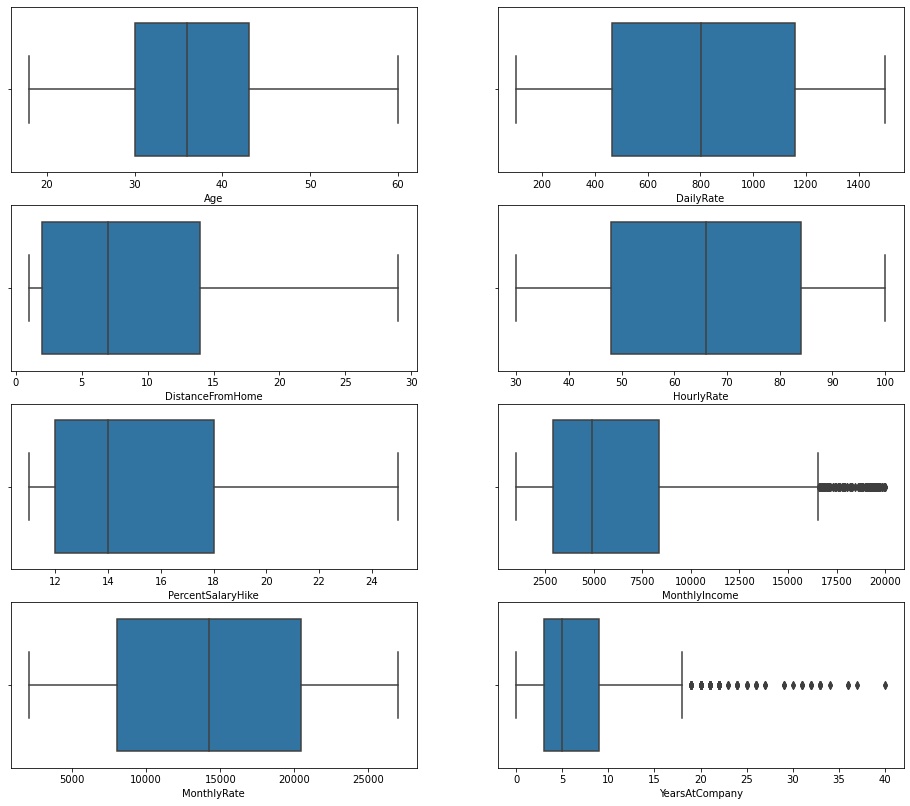

In [38]:
# Check for Outliers
fig,axes=plt.subplots(4,2,figsize=(16,14))
sns.boxplot(encoded_df['Age'],ax=axes[0,0])
sns.boxplot(encoded_df['DailyRate'],ax=axes[0,1])
sns.boxplot(encoded_df['DistanceFromHome'],ax=axes[1,0])
sns.boxplot(encoded_df['HourlyRate'],ax=axes[1,1])
sns.boxplot(encoded_df['PercentSalaryHike'],ax=axes[2,0])
sns.boxplot(encoded_df['MonthlyIncome'],ax=axes[2,1])
sns.boxplot(encoded_df['MonthlyRate'],ax=axes[3,0])
sns.boxplot(encoded_df['YearsAtCompany'],ax=axes[3,1])
# From the below box plots we can see that there are few outliers in the monthly income columns 
#but we can ignore them as they are not that sugnificant and will not affect. 
#Same is applicable for yearsatcompany column as some employees can have higher salaries
#as per there experiance so that is justified. Also the salries are not that high as the highest salary is 19999.
# so technically there are no outliers.

In [39]:
# Corelation Check: To see of columns are corelated. We will drop the column if corelation is GT 75%
encoded_df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


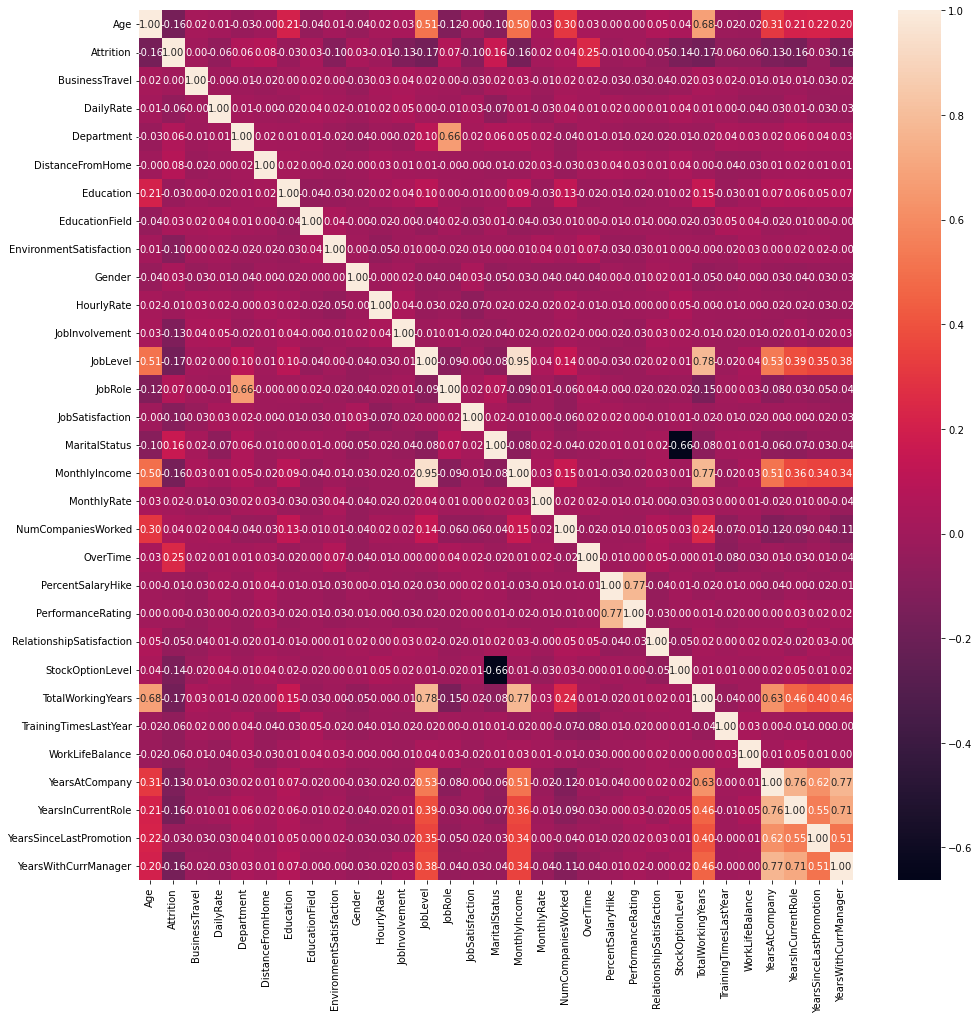

In [40]:
plt.figure(figsize=(16,16))
hm = sns.heatmap(encoded_df.corr(), cbar=True, annot=True, fmt='.2f')
                 #annot_kws={'size': 10})
plt.show()

In [41]:
def cor_var(df):
    cormat=df.corr().round(3)
    cormat2=df.corr().round(3)
    Dropped_cols=[]
    for i in cormat.columns:
        for j in cormat.index:
            if cormat[i][j]>=0.75 and cormat[i][j]!=1:
                if i in cormat2.columns and j in cormat2.columns:
                    cormat2.drop(i,axis=1,inplace=True)
                    Dropped_cols.append(i)
                print(f' {i},{j} corr coeff is {cormat[i][j]}')
    print(f'\nDropped columns because of high correlation coefficient are: \n{Dropped_cols}')
    return(f'\nConsider only below columns for Model Building: \n{list(cormat2.columns)}')
#df.drop('SalePrice',axis=1,inplace=True)  # Drop sales price as its the dependent variable
print(cor_var(encoded_df))

 JobLevel,MonthlyIncome corr coeff is 0.95
 JobLevel,TotalWorkingYears corr coeff is 0.782
 MonthlyIncome,JobLevel corr coeff is 0.95
 MonthlyIncome,TotalWorkingYears corr coeff is 0.773
 PercentSalaryHike,PerformanceRating corr coeff is 0.774
 PerformanceRating,PercentSalaryHike corr coeff is 0.774
 TotalWorkingYears,JobLevel corr coeff is 0.782
 TotalWorkingYears,MonthlyIncome corr coeff is 0.773
 YearsAtCompany,YearsInCurrentRole corr coeff is 0.759
 YearsAtCompany,YearsWithCurrManager corr coeff is 0.769
 YearsInCurrentRole,YearsAtCompany corr coeff is 0.759
 YearsWithCurrManager,YearsAtCompany corr coeff is 0.769

Dropped columns because of high correlation coefficient are: 
['JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'YearsAtCompany']

Consider only below columns for Model Building: 
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobRo

In [42]:
# From the above we can make the below conclusions:
#1) JObLevel,MonthlyIncome,TotalWorkingYears are corelated with each other-
    #We will keep MonthlyIncome out of these 3 as it makes more sence to use theis columns
    #out of the three corelated columns.
#2) PercentSalaryHike,PerformanceRating are also corelated-:
    # We will keep PercentSalaryHike
#3) YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager are also corelated:-
    #We will consider YearsWithCurrManager and YearsInCurrentRole are also corelated as the coefficient is 71%.
    #So statsistically all theree are corelated.
    #We will keep YearsInCurrentRole 

In [43]:
encoded_df.drop(columns=['JobLevel','TotalWorkingYears','PerformanceRating','YearsAtCompany','YearsWithCurrManager'],
                inplace=True)
encoded_df.shape  # Now the shape of the dataset is (2940,26)

(2940, 26)

In [44]:
encoded_df.head()  # THis is our dataset after all the cleaning and analysis

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,41,1,2,1102,2,1,2,1,2,0,94,3,7,4,2,5993,19479,8,1,11,1,0,0,1,4,0
1,49,0,1,279,1,8,1,1,3,1,61,2,6,2,1,5130,24907,1,0,23,4,1,3,3,7,1
2,37,1,2,1373,1,2,2,4,4,1,92,2,2,3,2,2090,2396,6,1,15,2,0,3,3,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,6,3,1,2909,23159,1,1,11,3,0,3,3,7,3
4,27,0,2,591,1,2,1,3,1,1,40,3,2,2,1,3468,16632,9,0,12,4,1,3,3,2,2


In [45]:
# Separate the feature and target variables
x=encoded_df.drop(['Attrition'],axis=1).values  # Feature
y=encoded_df['Attrition'].values    # Target Var

In [46]:
# Split the Data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
# Model Building- Decision Tree Model
# Import the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve,recall_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [48]:
model_dt_1=DecisionTreeClassifier(max_depth=10,random_state=42)
model_dt_1.fit(x_train,y_train)
model_dt_1_score_train=model_dt_1.score(x_train,y_train)
model_dt_1_score_test=model_dt_1.score(x_test,y_test)
print('Training Score is:',model_dt_1_score_train*100,'%')
print('Test Score is:',model_dt_1_score_test*100,'%')



Training Score is: 97.5765306122449 %
Test Score is: 92.00680272108843 %


In [49]:
model_dt_2=DecisionTreeClassifier(max_depth=14,random_state=42)
model_dt_2.fit(x_train,y_train)
model_dt_2_score_train=model_dt_2.score(x_train,y_train)
model_dt_2_score_test=model_dt_2.score(x_test,y_test)
print('Training Score is:',model_dt_2_score_train*100,'%')
print('Test Score is:',model_dt_2_score_test*100,'%')
## We are getting 99% accuracy


Training Score is: 99.91496598639455 %
Test Score is: 96.25850340136054 %


In [50]:
# Use Grid Search CV
fit_dec=DecisionTreeClassifier(random_state=42)
import time
np.random.seed(42)
start=time.time()
param_dist={'max_depth':[11,12,13,14,15,16,17],
            'min_samples_split':[1,2,4,5],
            'min_samples_leaf':[1,2,3,4,5]}
cv_rf=GridSearchCV(fit_dec,cv=10,param_grid=param_dist,n_jobs=2)
cv_rf.fit(x_train,y_train)
print('Best parameters using gridsearch: \n',cv_rf.best_params_)
end=time.time()
print('Time taken in grid search:{0: .2f}'.format(end-start))

Best parameters using gridsearch: 
 {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Time taken in grid search: 9.13


In [51]:
model_dt_3=DecisionTreeClassifier(max_depth= 15, min_samples_leaf=1, min_samples_split=2,random_state=42)
model_dt_3.fit(x_train,y_train)
model_dt_3_score_train=model_dt_3.score(x_train,y_train)
model_dt_3_score_test=model_dt_3.score(x_test,y_test)
print('Training Score is:',model_dt_3_score_train*100,'%')
print('Test Score is:',model_dt_3_score_test*100,'%')

Training Score is: 100.0 %
Test Score is: 96.25850340136054 %


In [52]:
#By optimising the variables using GridSearchCV we are getting a 100% accuracy on the training
#and 96% accuracy on the test data which is excellent.

In [53]:
predictions=model_dt_3.predict(x_test)
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [54]:
confusion_matrix(y_test,predictions)
# we can see that 481 0 are predicted as 0 and 85 1 are predicted as 1. 

array([[481,   8],
       [ 14,  85]], dtype=int64)

In [55]:
# Model Accuracy:
print('Model Accuracy is:',model_dt_3.score(x_test,y_test)*100)
# Recall 
print('Model Recall is:',recall_score(y_test,predictions)*100)

Model Accuracy is: 96.25850340136054
Model Recall is: 85.85858585858585


In [56]:
# calculating the probabilities for the AUC curve:
y_pred_prob=model_dt_3.predict_proba(x_test)[:,1]
y_pred_prob

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1.

In [57]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

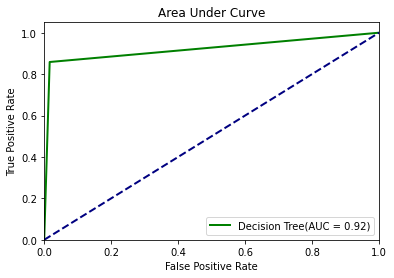

In [58]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [59]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

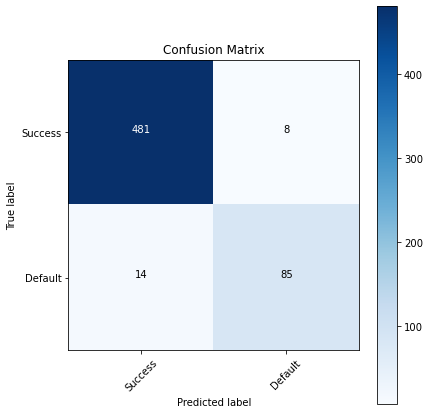

In [60]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

[Text(0.4787692608767304, 0.96875, 'X[17] <= 0.5\ngini = 0.268\nsamples = 2352\nvalue = [1977, 375]'),
 Text(0.20457214073829927, 0.90625, 'X[7] <= 1.5\ngini = 0.186\nsamples = 1680\nvalue = [1506, 174]'),
 Text(0.08108108108108109, 0.84375, 'X[23] <= 1.5\ngini = 0.317\nsamples = 349\nvalue = [280, 69]'),
 Text(0.034278180619644036, 0.78125, 'X[0] <= 37.5\ngini = 0.493\nsamples = 68\nvalue = [38, 30]'),
 Text(0.02109426499670402, 0.71875, 'X[11] <= 4.5\ngini = 0.444\nsamples = 39\nvalue = [13, 26]'),
 Text(0.01054713249835201, 0.65625, 'X[15] <= 4860.5\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(0.005273566249176005, 0.59375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.015820698747528016, 0.59375, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.03164139749505603, 0.65625, 'X[6] <= 2.5\ngini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.026367831245880026, 0.59375, 'X[12] <= 3.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.02109426499670402, 0.53125,

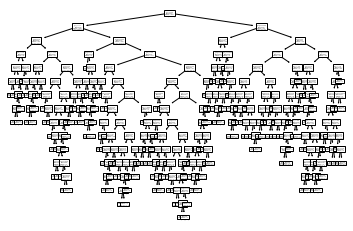

In [61]:
from sklearn import tree
tree.plot_tree(model_dt_3)

In [62]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [63]:
dot_data = StringIO()
export_graphviz(model_dt_3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
plt.savefig("figure.png")
#Image(graph.create_png())
graph

<Figure size 432x288 with 0 Axes>

In [ ]:
# Building the model using SVM algorithm

In [65]:
# Doing the standardization of data as its required in SVM as we calcute the Euclidean distances
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [66]:
x

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -2.49382042,
        -0.0632959 , -0.67914568],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.33809616,
         0.76499762, -0.36871529],
       [ 0.008343  ,  0.59004834,  1.41436324, ...,  0.33809616,
        -1.16768726, -0.67914568],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ...,  0.33809616,
        -0.61549158, -0.67914568],
       [ 1.32236521, -0.91319439,  0.54667746, ..., -1.07786213,
         0.48889978, -0.67914568],
       [-0.32016256,  0.59004834, -0.43256792, ...,  1.75405446,
        -0.33939374, -0.36871529]])

In [67]:
# Train test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
# importing the libraries required
from sklearn import metrics
from sklearn.svm import SVC

In [69]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [71]:
# Building the model with default parameters for SVM
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print("Accuracy score for test is:",metrics.accuracy_score(y_test,y_pred))

# By default parameters we are getting a accuracy of 91%

Accuracy score for test is: 0.9098639455782312


In [72]:
# Trainign data Accuracy is 94.6%
svc.score(x_train,y_train)

0.9468537414965986

In [80]:
# optimizing the SVm parameters: Kernel,C-value and gamma parameter
from sklearn.model_selection import GridSearchCV
svm_model=SVC()
tuned_parameters={'C': (np.arange(1,5,1)) ,
                  'kernel': ['linear','rbf','poly'],
                  'gamma': [0.09,0.1,0,2,0.3]}
model_svm=GridSearchCV(svm_model,tuned_parameters,cv=10,scoring='accuracy')
model_svm.fit(x_train,y_train)
print(model_svm.best_score_)
print("The best parameters are",model_svm.best_params_)

0.958759466282005
The best parameters are {'C': 4, 'gamma': 0.09, 'kernel': 'rbf'}


In [81]:
# Building the model with optimized parameters
svm_model_final=SVC(C=4,kernel='rbf',gamma=0.09)
svm_model_final.fit(x_train,y_train)
y_pred=svm_model_final.predict(x_test)
print("Accuracy score for Train is:",svm_model_final.score(x_train,y_train))
print("Accuracy score for test is:",metrics.accuracy_score(y_test,y_pred))
# We can see that after optimization we are getting a 100% accuracy on training dataset
#and almost 97% accuracy in test data which is quite good.
# With the decision tree model we got the Training Score as 100.0 %
# and Test Score is: 96.25%
# So we can use any algorithm for model building as both the Desision tree and SVM models are giving same accuracies.
# We are able to predict most of the classes correctly.

Accuracy score for Train is: 1.0
Accuracy score for test is: 0.9693877551020408


In [82]:
# y_pred_1=svm_model_final.predict(x_train)
# print("Accuracy score for train is:",metrics.accuracy_score(y_train,y_pred_1))

Accuracy score for train is: 1.0
